In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm
import random

# Define learning parameters

In [2]:
# learning parameters
batch_size = 256 # Was previously 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
scheduler_g = torch.optim.lr_scheduler.StepLR(optim_g, step_size=100, gamma=0.9)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)
scheduler_d = torch.optim.lr_scheduler.StepLR(optim_d, step_size=100, gamma=0.9)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

235it [00:08, 28.51it/s]                                                        


Epoch 1 of 100
Generator loss: 2.09255304, Discriminator loss: 1.15817061


235it [00:08, 28.32it/s]                                                        


Epoch 2 of 100
Generator loss: 5.29498905, Discriminator loss: 0.31936753


235it [00:08, 28.78it/s]                                                        


Epoch 3 of 100
Generator loss: 8.02550134, Discriminator loss: 0.21712568


235it [00:07, 31.06it/s]                                                        


Epoch 4 of 100
Generator loss: 5.12619774, Discriminator loss: 0.72683323


235it [00:07, 30.23it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


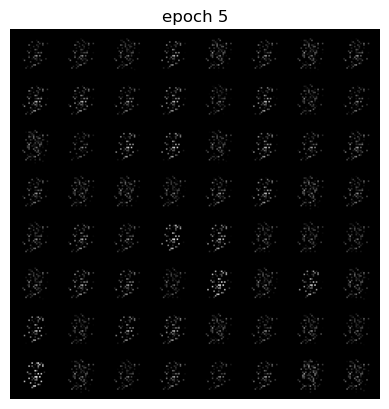

Epoch 5 of 100
Generator loss: 4.71117603, Discriminator loss: 0.74372308


235it [00:07, 30.78it/s]                                                        


Epoch 6 of 100
Generator loss: 3.37778261, Discriminator loss: 0.82147094


235it [00:08, 27.36it/s]                                                        


Epoch 7 of 100
Generator loss: 2.20444928, Discriminator loss: 0.94016372


235it [00:07, 30.20it/s]                                                        


Epoch 8 of 100
Generator loss: 2.37504966, Discriminator loss: 0.95166121


235it [00:08, 28.48it/s]                                                        


Epoch 9 of 100
Generator loss: 1.99385283, Discriminator loss: 0.92453392


235it [00:08, 27.94it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


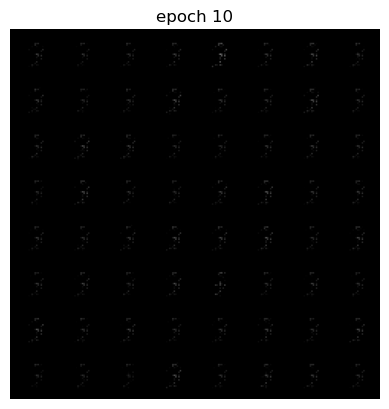

Epoch 10 of 100
Generator loss: 1.98999805, Discriminator loss: 0.93412501


235it [00:08, 29.00it/s]                                                        


Epoch 11 of 100
Generator loss: 1.90987922, Discriminator loss: 0.82700160


235it [00:09, 25.43it/s]                                                        


Epoch 12 of 100
Generator loss: 2.60360066, Discriminator loss: 0.65365313


235it [00:07, 29.80it/s]                                                        


Epoch 13 of 100
Generator loss: 2.81901408, Discriminator loss: 0.49716378


235it [00:08, 29.19it/s]                                                        


Epoch 14 of 100
Generator loss: 3.02647879, Discriminator loss: 0.40616676


235it [00:07, 30.28it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


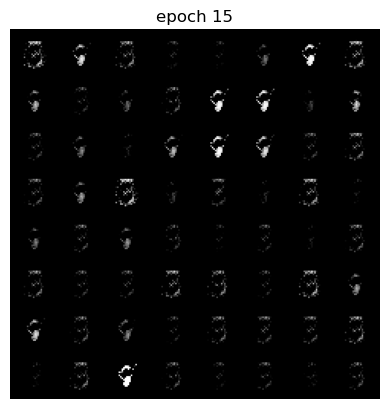

Epoch 15 of 100
Generator loss: 2.98419282, Discriminator loss: 0.45992215


235it [00:07, 31.09it/s]                                                        


Epoch 16 of 100
Generator loss: 2.88271961, Discriminator loss: 0.47188763


235it [00:07, 32.01it/s]                                                        


Epoch 17 of 100
Generator loss: 2.83817788, Discriminator loss: 0.47529030


235it [00:07, 29.77it/s]                                                        


Epoch 18 of 100
Generator loss: 2.60986908, Discriminator loss: 0.59175129


235it [00:07, 31.08it/s]                                                        


Epoch 19 of 100
Generator loss: 2.27686455, Discriminator loss: 0.64999507


235it [00:07, 31.10it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


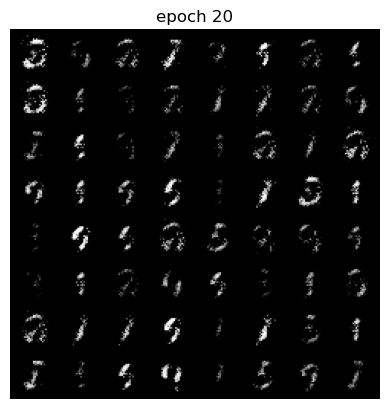

Epoch 20 of 100
Generator loss: 2.25232993, Discriminator loss: 0.62890940


235it [00:07, 31.06it/s]                                                        


Epoch 21 of 100
Generator loss: 2.32112692, Discriminator loss: 0.61789839


235it [00:08, 29.33it/s]                                                        


Epoch 22 of 100
Generator loss: 2.32939028, Discriminator loss: 0.68402497


235it [00:07, 31.11it/s]                                                        


Epoch 23 of 100
Generator loss: 2.26382565, Discriminator loss: 0.66057819


235it [00:07, 31.00it/s]                                                        


Epoch 24 of 100
Generator loss: 2.64421460, Discriminator loss: 0.55344033


235it [00:07, 30.55it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


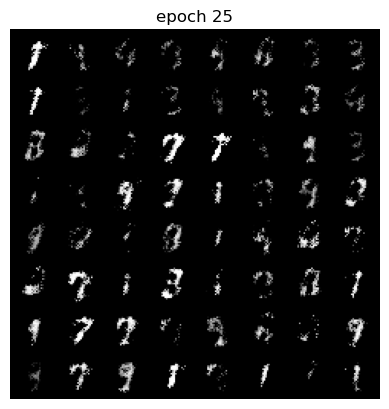

Epoch 25 of 100
Generator loss: 2.23904688, Discriminator loss: 0.67247094


235it [00:07, 30.85it/s]                                                        


Epoch 26 of 100
Generator loss: 2.42195124, Discriminator loss: 0.63356237


235it [00:08, 29.07it/s]                                                        


Epoch 27 of 100
Generator loss: 2.29291112, Discriminator loss: 0.66491522


235it [00:07, 31.10it/s]                                                        


Epoch 28 of 100
Generator loss: 2.07721515, Discriminator loss: 0.73513199


235it [00:07, 31.97it/s]                                                        


Epoch 29 of 100
Generator loss: 2.05489491, Discriminator loss: 0.75719059


235it [00:07, 31.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


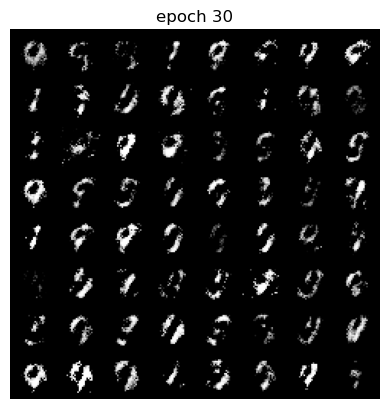

Epoch 30 of 100
Generator loss: 2.08993861, Discriminator loss: 0.74637810


235it [00:08, 28.28it/s]                                                        


Epoch 31 of 100
Generator loss: 1.95998939, Discriminator loss: 0.77201286


235it [00:07, 29.90it/s]                                                        


Epoch 32 of 100
Generator loss: 2.16971626, Discriminator loss: 0.71703513


235it [00:07, 29.42it/s]                                                        


Epoch 33 of 100
Generator loss: 2.01528077, Discriminator loss: 0.76419481


235it [00:07, 29.93it/s]                                                        


Epoch 34 of 100
Generator loss: 1.82834152, Discriminator loss: 0.84371370


235it [00:07, 31.32it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


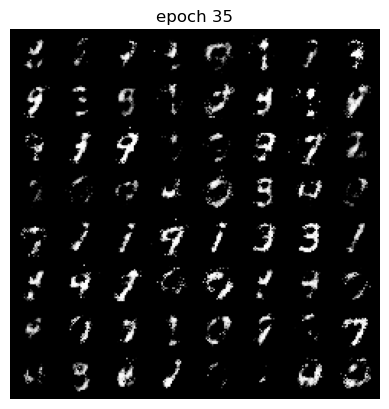

Epoch 35 of 100
Generator loss: 2.00981012, Discriminator loss: 0.74869873


235it [00:07, 32.13it/s]                                                        


Epoch 36 of 100
Generator loss: 1.82230707, Discriminator loss: 0.83612143


235it [00:07, 31.12it/s]                                                        


Epoch 37 of 100
Generator loss: 1.95261197, Discriminator loss: 0.79754076


235it [00:07, 31.01it/s]                                                        


Epoch 38 of 100
Generator loss: 1.98586311, Discriminator loss: 0.75836878


235it [00:07, 30.85it/s]                                                        


Epoch 39 of 100
Generator loss: 1.98809911, Discriminator loss: 0.80958473


235it [00:07, 31.16it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


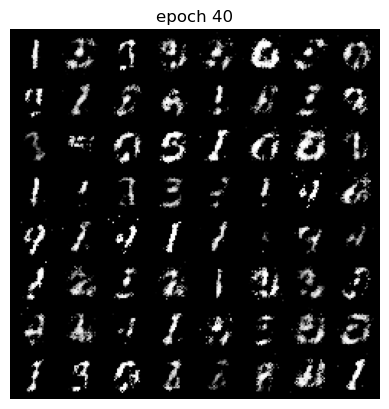

Epoch 40 of 100
Generator loss: 1.87725454, Discriminator loss: 0.84208638


235it [00:08, 27.78it/s]                                                        


Epoch 41 of 100
Generator loss: 1.92671094, Discriminator loss: 0.79463279


235it [00:08, 26.68it/s]                                                        


Epoch 42 of 100
Generator loss: 1.90883116, Discriminator loss: 0.81654361


235it [00:08, 28.92it/s]                                                        


Epoch 43 of 100
Generator loss: 1.86052499, Discriminator loss: 0.83372324


235it [00:07, 29.85it/s]                                                        


Epoch 44 of 100
Generator loss: 1.65614270, Discriminator loss: 0.91755042


235it [00:07, 30.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


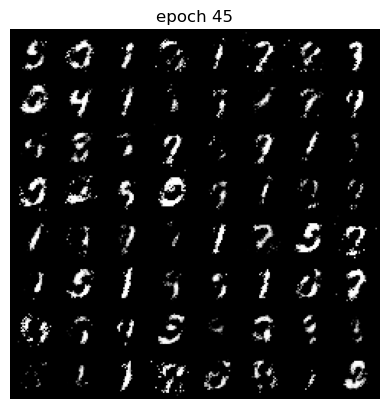

Epoch 45 of 100
Generator loss: 1.73690387, Discriminator loss: 0.86346409


235it [00:07, 30.19it/s]                                                        


Epoch 46 of 100
Generator loss: 1.91590273, Discriminator loss: 0.83661546


235it [00:07, 31.36it/s]                                                        


Epoch 47 of 100
Generator loss: 1.75876850, Discriminator loss: 0.84723328


235it [00:07, 32.33it/s]                                                        


Epoch 48 of 100
Generator loss: 1.70258907, Discriminator loss: 0.86106385


235it [00:07, 31.59it/s]                                                        


Epoch 49 of 100
Generator loss: 1.76077185, Discriminator loss: 0.86673278


235it [00:07, 30.31it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


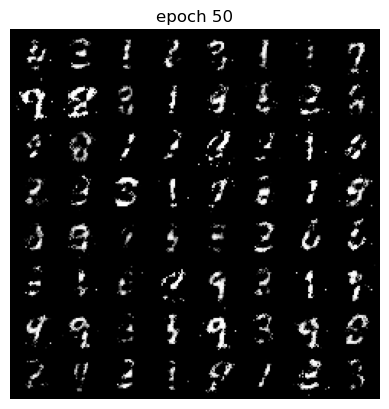

Epoch 50 of 100
Generator loss: 1.79767297, Discriminator loss: 0.85386148


235it [00:07, 31.29it/s]                                                        


Epoch 51 of 100
Generator loss: 1.74956381, Discriminator loss: 0.87006685


235it [00:07, 30.30it/s]                                                        


Epoch 52 of 100
Generator loss: 1.80597720, Discriminator loss: 0.83953561


235it [00:07, 31.65it/s]                                                        


Epoch 53 of 100
Generator loss: 1.77624204, Discriminator loss: 0.86643397


235it [00:07, 31.14it/s]                                                        


Epoch 54 of 100
Generator loss: 1.54287730, Discriminator loss: 0.95268632


235it [00:07, 31.80it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


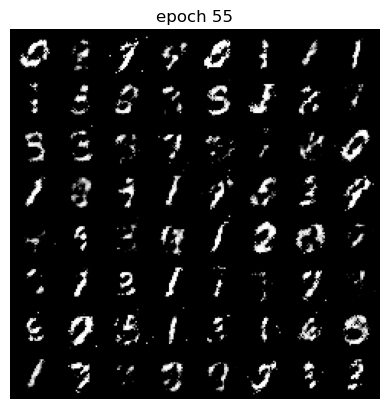

Epoch 55 of 100
Generator loss: 1.77568469, Discriminator loss: 0.85245026


235it [00:07, 31.31it/s]                                                        


Epoch 56 of 100
Generator loss: 1.70080069, Discriminator loss: 0.90018873


235it [00:07, 31.81it/s]                                                        


Epoch 57 of 100
Generator loss: 1.68642386, Discriminator loss: 0.89958629


235it [00:07, 32.28it/s]                                                        


Epoch 58 of 100
Generator loss: 1.53008547, Discriminator loss: 0.94605247


235it [00:07, 31.32it/s]                                                        


Epoch 59 of 100
Generator loss: 1.64776913, Discriminator loss: 0.89327981


235it [00:07, 31.51it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


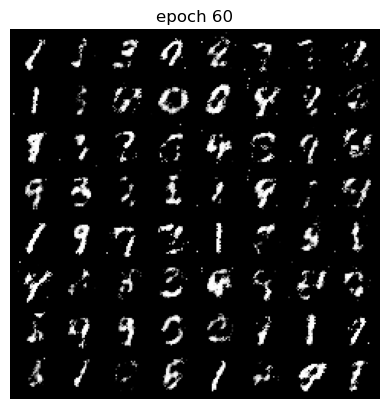

Epoch 60 of 100
Generator loss: 1.58283847, Discriminator loss: 0.93587559


235it [00:07, 31.74it/s]                                                        


Epoch 61 of 100
Generator loss: 1.48832756, Discriminator loss: 0.94932664


235it [00:07, 30.99it/s]                                                        


Epoch 62 of 100
Generator loss: 1.49907514, Discriminator loss: 0.96169922


235it [00:07, 32.15it/s]                                                        


Epoch 63 of 100
Generator loss: 1.53118112, Discriminator loss: 0.96984837


235it [00:07, 31.43it/s]                                                        


Epoch 64 of 100
Generator loss: 1.53236112, Discriminator loss: 0.96426177


235it [00:07, 31.84it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


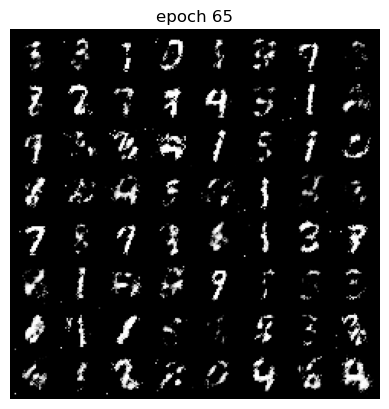

Epoch 65 of 100
Generator loss: 1.61155937, Discriminator loss: 0.91952614


235it [00:07, 32.04it/s]                                                        


Epoch 66 of 100
Generator loss: 1.50490713, Discriminator loss: 0.97769736


235it [00:07, 32.21it/s]                                                        


Epoch 67 of 100
Generator loss: 1.58583265, Discriminator loss: 0.94511596


235it [00:07, 32.36it/s]                                                        


Epoch 68 of 100
Generator loss: 1.64281225, Discriminator loss: 0.89611647


235it [00:07, 31.92it/s]                                                        


Epoch 69 of 100
Generator loss: 1.51566423, Discriminator loss: 0.96728020


235it [00:07, 33.07it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


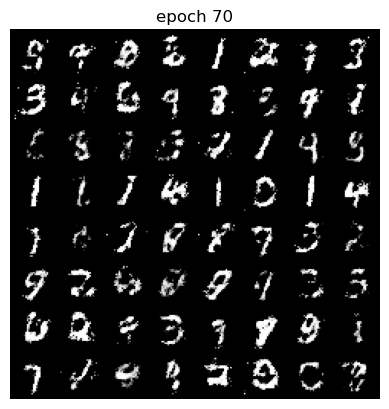

Epoch 70 of 100
Generator loss: 1.50710800, Discriminator loss: 0.97440591


235it [00:07, 31.51it/s]                                                        


Epoch 71 of 100
Generator loss: 1.48488088, Discriminator loss: 0.96887876


235it [00:07, 33.11it/s]                                                        


Epoch 72 of 100
Generator loss: 1.47697525, Discriminator loss: 0.96847023


235it [00:07, 31.57it/s]                                                        


Epoch 73 of 100
Generator loss: 1.45340698, Discriminator loss: 0.99080683


235it [00:07, 32.03it/s]                                                        


Epoch 74 of 100
Generator loss: 1.44266435, Discriminator loss: 0.99395589


235it [00:07, 32.00it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


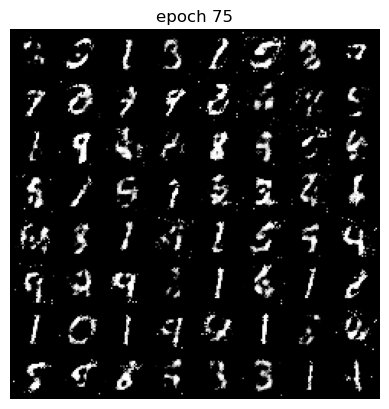

Epoch 75 of 100
Generator loss: 1.48691751, Discriminator loss: 0.99109634


235it [00:07, 32.02it/s]                                                        


Epoch 76 of 100
Generator loss: 1.44666122, Discriminator loss: 0.98618977


235it [00:07, 32.00it/s]                                                        


Epoch 77 of 100
Generator loss: 1.43997262, Discriminator loss: 1.01686312


235it [00:07, 30.52it/s]                                                        


Epoch 78 of 100
Generator loss: 1.47325607, Discriminator loss: 0.98455838


235it [00:07, 31.68it/s]                                                        


Epoch 79 of 100
Generator loss: 1.45014815, Discriminator loss: 0.97184559


235it [00:07, 30.61it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


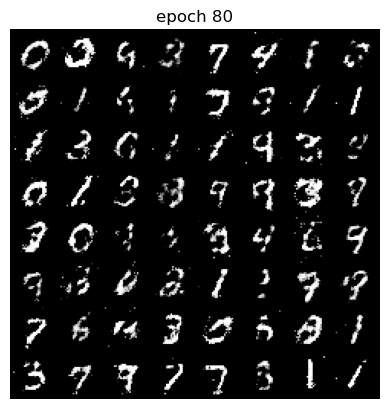

Epoch 80 of 100
Generator loss: 1.48348519, Discriminator loss: 0.98722059


235it [00:07, 32.22it/s]                                                        


Epoch 81 of 100
Generator loss: 1.45667808, Discriminator loss: 0.98952410


235it [00:07, 33.11it/s]                                                        


Epoch 82 of 100
Generator loss: 1.38874465, Discriminator loss: 1.03671979


235it [00:07, 29.61it/s]                                                        


Epoch 83 of 100
Generator loss: 1.41038528, Discriminator loss: 1.01706116


235it [00:07, 32.47it/s]                                                        


Epoch 84 of 100
Generator loss: 1.35472019, Discriminator loss: 1.02087763


235it [00:07, 32.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


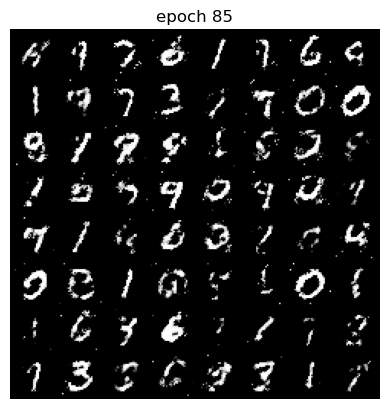

Epoch 85 of 100
Generator loss: 1.38171114, Discriminator loss: 1.02645648


235it [00:07, 31.61it/s]                                                        


Epoch 86 of 100
Generator loss: 1.36024175, Discriminator loss: 1.02945392


235it [00:07, 33.55it/s]                                                        


Epoch 87 of 100
Generator loss: 1.35532863, Discriminator loss: 1.03293099


235it [00:07, 33.34it/s]                                                        


Epoch 88 of 100
Generator loss: 1.34967142, Discriminator loss: 1.04613454


235it [00:07, 32.91it/s]                                                        


Epoch 89 of 100
Generator loss: 1.36874273, Discriminator loss: 1.01826746


235it [00:07, 31.99it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


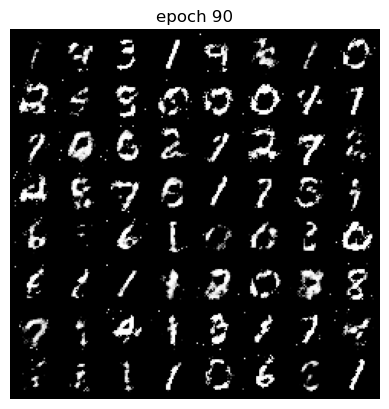

Epoch 90 of 100
Generator loss: 1.40164441, Discriminator loss: 1.02447710


235it [00:07, 31.03it/s]                                                        


Epoch 91 of 100
Generator loss: 1.34712332, Discriminator loss: 1.03273271


235it [00:07, 32.38it/s]                                                        


Epoch 92 of 100
Generator loss: 1.42465760, Discriminator loss: 1.00843590


235it [00:07, 32.75it/s]                                                        


Epoch 93 of 100
Generator loss: 1.35881605, Discriminator loss: 1.04117607


235it [00:07, 33.50it/s]                                                        


Epoch 94 of 100
Generator loss: 1.33566388, Discriminator loss: 1.03703665


235it [00:07, 31.01it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


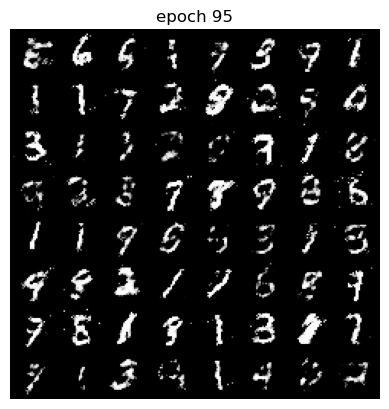

Epoch 95 of 100
Generator loss: 1.40197451, Discriminator loss: 1.00659474


235it [00:07, 29.61it/s]                                                        


Epoch 96 of 100
Generator loss: 1.34838248, Discriminator loss: 1.05373214


235it [00:07, 31.90it/s]                                                        


Epoch 97 of 100
Generator loss: 1.31440972, Discriminator loss: 1.04739643


235it [00:07, 32.20it/s]                                                        


Epoch 98 of 100
Generator loss: 1.39316959, Discriminator loss: 1.02341764


235it [00:07, 32.34it/s]                                                        


Epoch 99 of 100
Generator loss: 1.32216772, Discriminator loss: 1.05122018


235it [00:07, 31.80it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


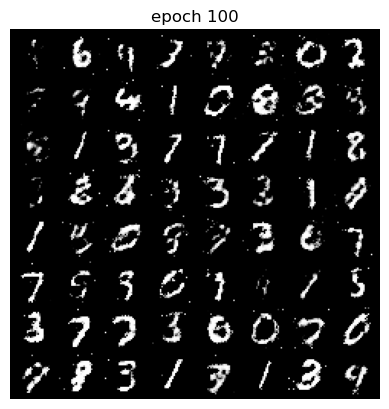

Epoch 100 of 100
Generator loss: 1.33450958, Discriminator loss: 1.04686833


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        x_real = data[0].flatten(start_dim=1)
        y_real = label_real(x_real.size(0))
        
        noise = create_noise(sample_size, nz)
        x_fake = generator.forward(noise).flatten(start_dim=1)
        y_fake = label_fake(sample_size)
        
        discriminator.zero_grad()
        loss_discriminator = discriminator_loss(discriminator.forward(x_real), y_real) + discriminator_loss(discriminator.forward(x_fake), y_fake)
        loss_discriminator.backward()
        optim_d.step()
        loss_d += loss_discriminator.item()
        
        generator.zero_grad()
        g_output = generator.forward(noise).flatten(start_dim=1)
        
        #Method 1
        loss_generator = generator_loss(discriminator.forward(g_output), label_real(sample_size))
        loss_generator.backward()
        #Method 2
        #loss_generator = generator_loss(discriminator.forward(g_output), label_fake(sample_size))
        #loss_generator.backward()
        
        optim_g.step()
        loss_g += loss_generator.item()
        
        ######################################
    
    scheduler_g.step()
    scheduler_d.step()
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if ((epoch + 1) % 5 == 0):
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

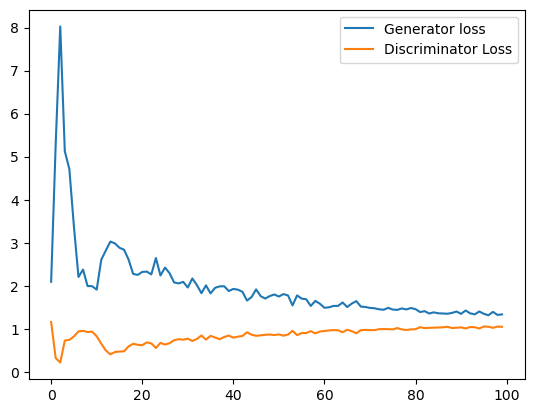

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')